In [8]:
from sklearn.datasets import load_files

categories = ['alt.atheism', 'rec.sport.hockey', 'comp.graphics',
              'sci.crypt','comp.os.ms-windows.misc','sci.electronics',
              'comp.sys.ibm.pc.hardware',
              'sci.med','comp.sys.mac.hardware', 'sci.space',
              'comp.windows.x','soc.religion.christian','misc.forsale',
              'talk.politics.gus','rec.autos','talk.politics.mideast',
              'rec.motorcycles','talk.politics.misc','rec.sport.baseball',
              'talk.religion.misc']
data_folder = './data/20news-bydate-train'  # 这里替换为你的数据目录路径
newsgroups = load_files(data_folder, categories=categories, encoding='latin1')
X_raw = newsgroups.data
y = newsgroups.target
# print(y)
# print(X_raw)

In [6]:
print(y.shape)

(10768,)


In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\b\d+\b', '', text)  # Remove digits
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = text.lower().split()  # Lowercase and split into words
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]  # Remove stopwords and lemmatize
    return ' '.join(text)

X = [preprocess_text(text) for text in X_raw]



In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\24582\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\24582\AppData\Roaming\nltk_data...


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\24582\AppData\Roaming\nltk_data...


True

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

k = 20  # Set the number of clusters equal to the number of categories
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_tfidf)


In [20]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_tfidf, clusters, sample_size=1000))

print("Calinski-Harabasz Index: %0.3f"
      % metrics.calinski_harabasz_score(X_tfidf.toarray(), clusters))


Silhouette Coefficient: 0.007
Calinski-Harabasz Index: 17.255


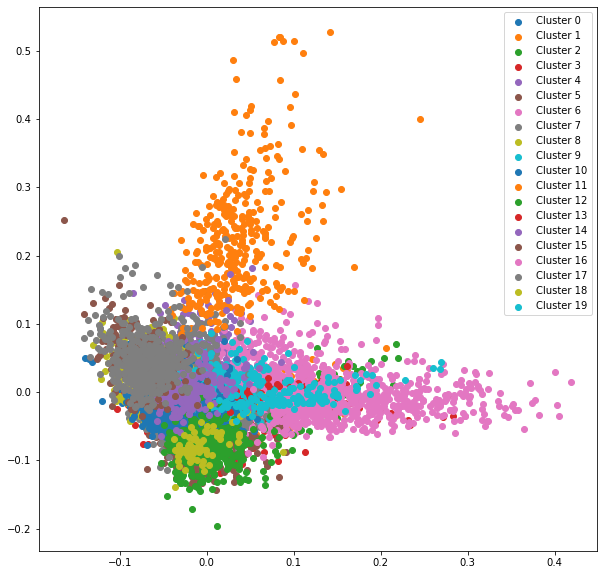

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 10))
for i in range(k):
    cluster_i = X_pca[clusters == i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1], label=f'Cluster {i}')
plt.legend()
plt.show()


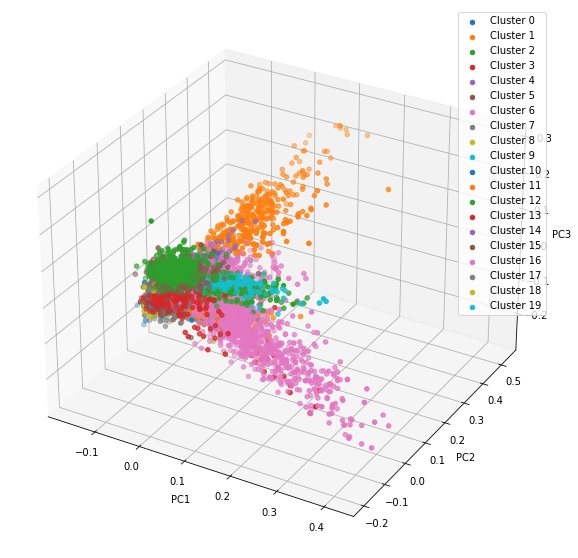

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use PCA to reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    cluster_i = X_pca[clusters == i]
    ax.scatter(cluster_i[:, 0], cluster_i[:, 1], cluster_i[:, 2], label=f'Cluster {i}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()
